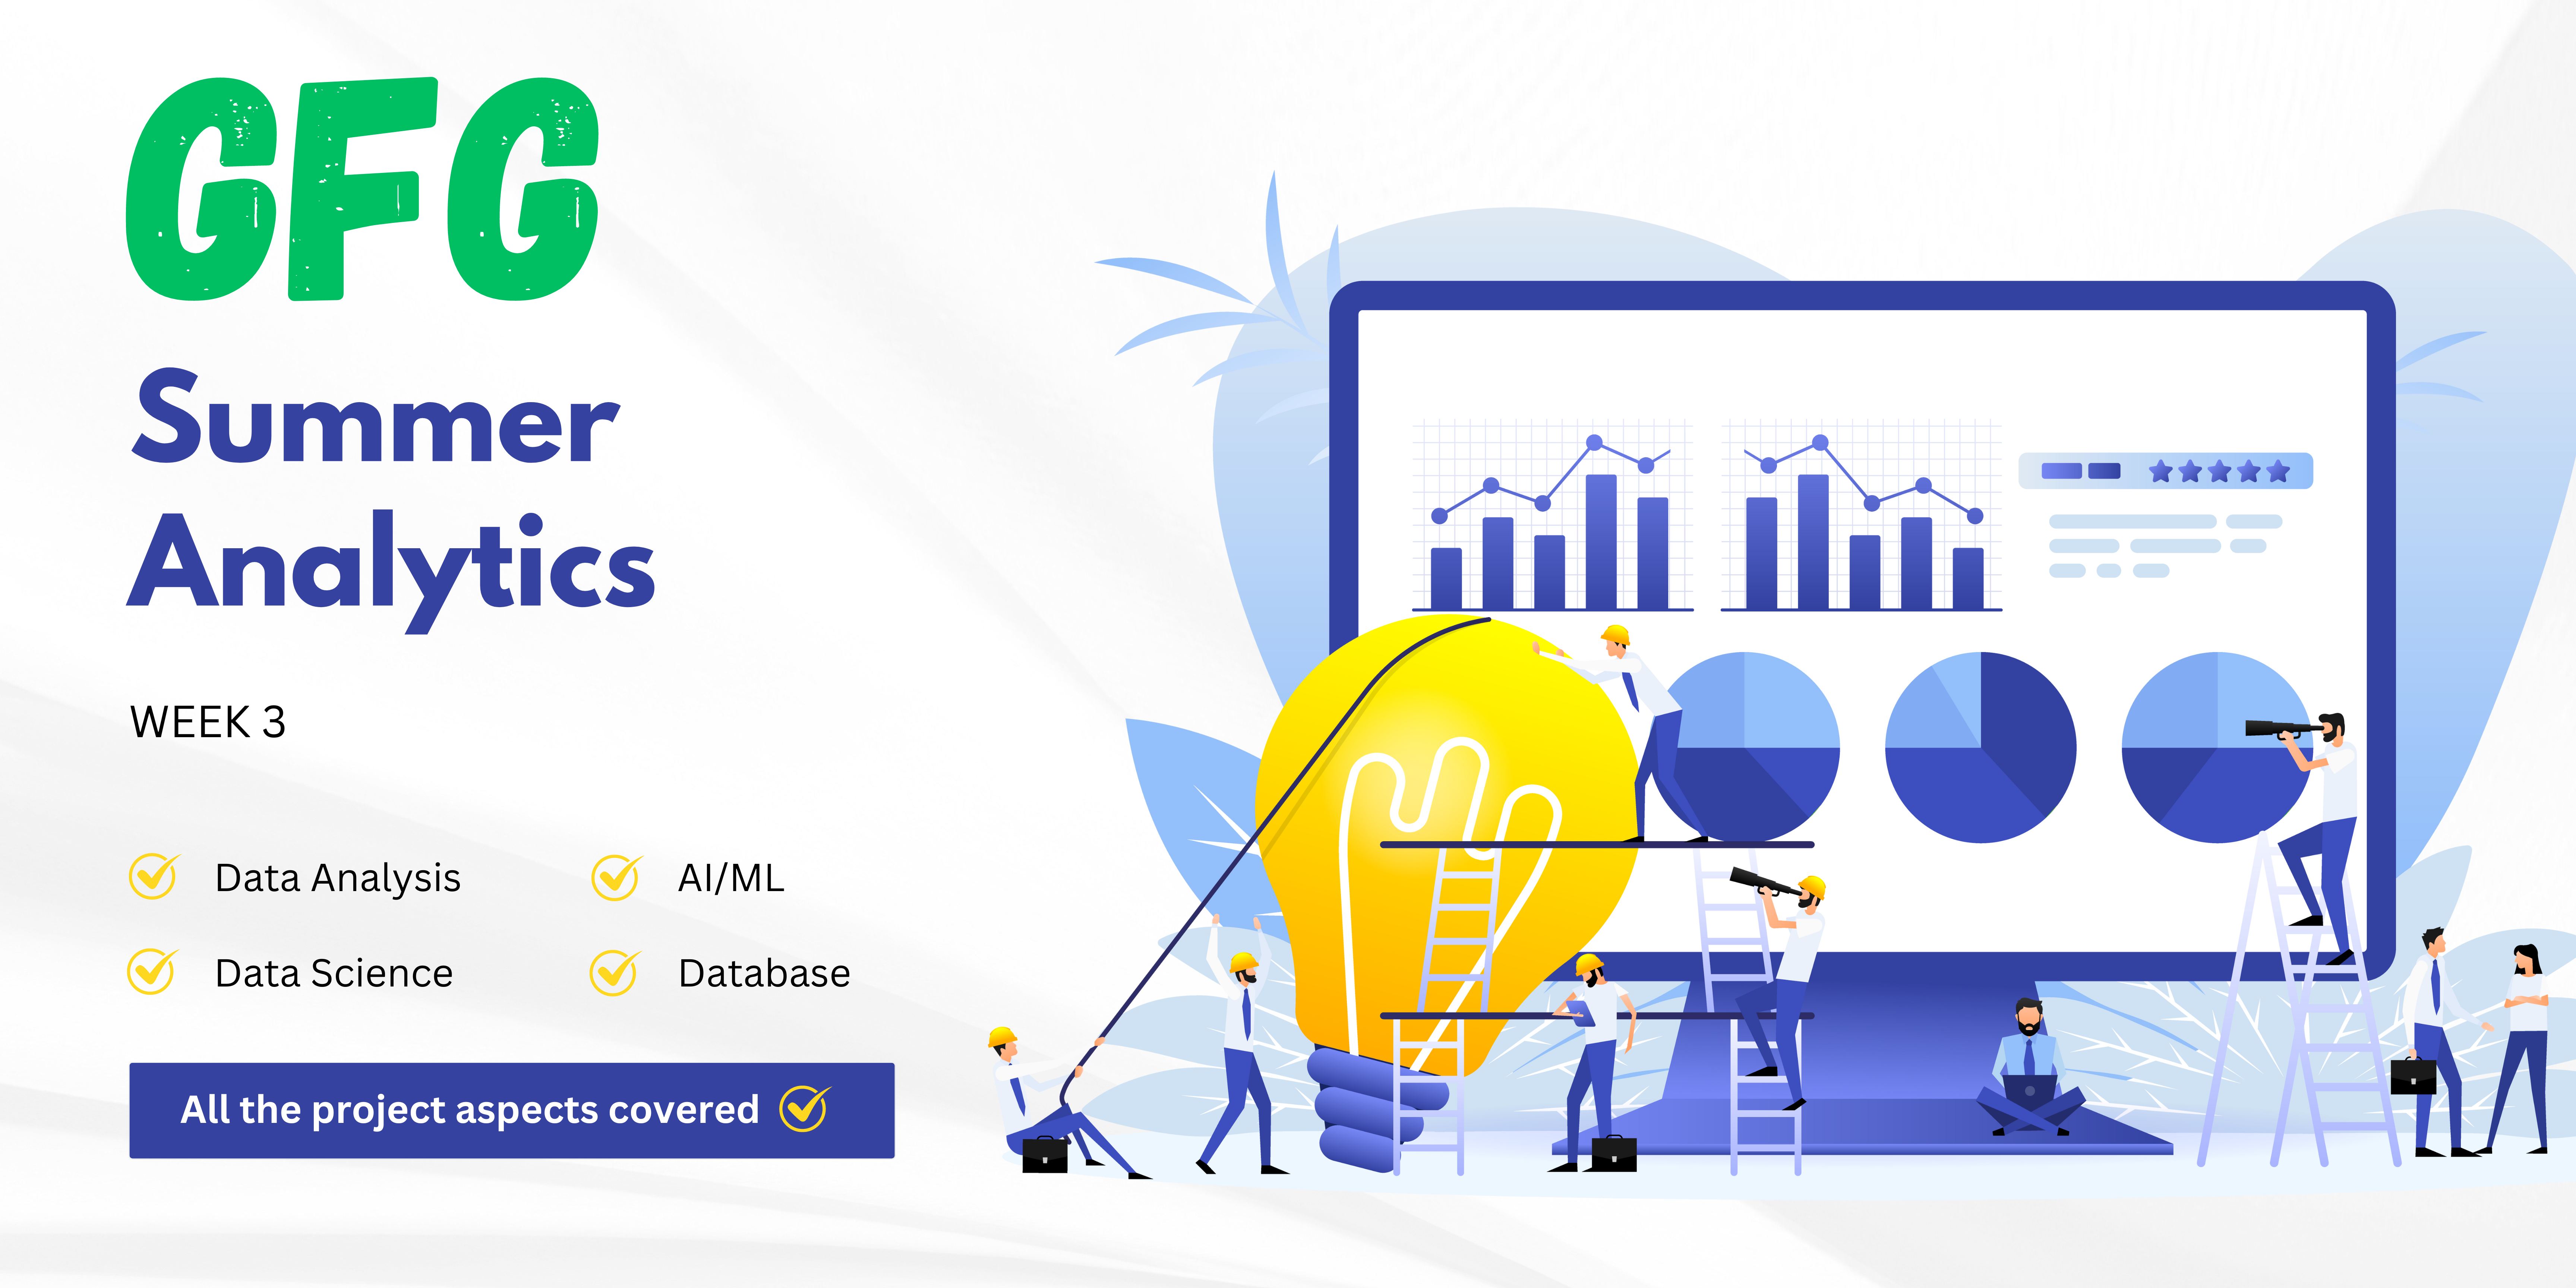

---------------------------------------------------------------------------------------------------------------


The steps provided ensure a structured approach to developing a predictive model for determining the likelihood of individuals receiving the xyz and seasonal flu vaccines. Here's a detailed explanation of how each step contributes to achieving this goal:

**Step 1:** **Load the Data**

Objective: Import the datasets needed for training and testing the models.

Why: To have the data ready for exploration, cleaning, and analysis.

How: Use pandas to load CSV files containing training features, training labels, test features, and the submission format.

In [ ]:
import pandas as pd

# Load datasets
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')
test_features = pd.read_csv('test_set_features.csv')
submission_format = pd.read_csv('submission_format.csv')

----------------------------------------------------------------------------------------------------------------

**Step 2:** **Explore and Clean the Data**

1.  Identify numeric and non-numeric columns.
2.  Handle missing values separately for each type.


**Objective:** Understand the data structure and handle any missing or inconsistent data.

**Why:** Ensure data quality and prepare it for model training.

**How:** Identify numeric and non-numeric columns, handle missing values appropriately for each type, and check for any anomalies.

In [ ]:
# Load datasets
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')
test_features = pd.read_csv('test_set_features.csv')
submission_format = pd.read_csv('submission_format.csv')

# Display first few rows of the datasets
print(train_features.head())
print(train_labels.head())
print(test_features.head())
print(submission_format.head())

# Check for missing values
print(train_features.isnull().sum())
print(train_labels.isnull().sum())
print(test_features.isnull().sum())
print(submission_format.isnull().sum())

# Separate numeric and non-numeric columns
numeric_cols = train_features.select_dtypes(include=['number']).columns
non_numeric_cols = train_features.select_dtypes(exclude=['number']).columns

# Handle missing values
train_features[numeric_cols] = train_features[numeric_cols].fillna(train_features[numeric_cols].mean())
train_features[non_numeric_cols] = train_features[non_numeric_cols].fillna(train_features[non_numeric_cols].mode().iloc[0])

test_features[numeric_cols] = test_features[numeric_cols].fillna(test_features[numeric_cols].mean())
test_features[non_numeric_cols] = test_features[non_numeric_cols].fillna(test_features[non_numeric_cols].mode().iloc[0])


   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

--------------------------------------------------------------------------------------------------------------------------

**Step 3:** **Feature Engineering**

**Objective:** Transform raw data into features suitable for machine learning models.

**Why:** Machine learning algorithms require numeric and scaled features for optimal performance.

**How:** One-hot encode categorical variables and scale numeric features.

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Combine train and test features for consistent encoding
all_features = pd.concat([train_features, test_features], axis=0)

# Reset index to avoid InvalidIndexError
all_features.reset_index(drop=True, inplace=True)

# Define categorical features based on column names in all_features
categorical_features = [
    'age_group_18 - 34 Years', 'age_group_35 - 44 Years', 'age_group_45 - 54 Years', 'age_group_55 - 64 Years', 'age_group_65+ Years',
    'education_< 12 Years', 'education_12 Years', 'education_College Graduate', 'education_Some College',
    'race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
    'sex_Male',
    'income_poverty_Below Poverty', 'income_poverty_> $75,000',
    'marital_status_Married', 'marital_status_Not Married',
    'rent_or_own_Own', 'rent_or_own_Rent',
    'employment_status_Employed', 'employment_status_Not in Labor Force', 'employment_status_Unemployed',
    'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
    'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit', 'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
    'hhs_geo_region_qufhixun',
    'census_msa_MSA, Principle City', 'census_msa_Non-MSA'
]

# Verify if all categorical features are present in all_features columns
missing_features = [feature for feature in categorical_features if feature not in all_features.columns]
if missing_features:
    print(f"Error: Missing categorical features in all_features: {missing_features}")
else:
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse=False)

    # Fit and transform categorical features
    encoded_features = encoder.fit_transform(all_features[categorical_features])

    # Get the encoded feature names from encoder categories
    encoded_categories = encoder.categories_
    encoded_feature_names = [f"{feature}_{category}" for i, feature in enumerate(categorical_features) for category in encoded_categories[i][1:]]

    # Convert encoded features to DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

    # Concatenate encoded features with numerical features
    all_features_encoded = pd.concat([encoded_df, all_features[numerical_features]], axis=1)

    # Separate back into train and test sets
    train_features_encoded = all_features_encoded.iloc[:len(train_features), :]
    test_features_encoded = all_features_encoded.iloc[len(train_features):, :]

    # Scaling numerical features
    scaler = StandardScaler()
    train_features_encoded[numerical_features] = scaler.fit_transform(train_features_encoded[numerical_features])
    test_features_encoded[numerical_features] = scaler.transform(test_features_encoded[numerical_features])

    # Assign back to train_features and test_features
    train_features = train_features_encoded
    test_features = test_features_encoded


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-22-b7e97ed6995b>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_encoded[numerical_features] = scaler.fit_transform(train_features_encoded[numerical_features])
<ipython-input-22-b7e97ed6995b>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

--------------------------------------------------------------------------------------------------------

**Step 4: Data Splitting**

**Objective:** Split the training data into training and validation sets.

**Why:** To evaluate the model's performance on unseen data before testing.

**How:** Use train_test_split to create training and validation datasets.

In [24]:
from sklearn.model_selection import train_test_split

# Define features and target
X = train_features
y = train_labels[['xyz_vaccine', 'seasonal_vaccine']]

# Optional: Split the training data for cross-validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


-----------------------------------------------------------------------------------------------

**Step 5:** **Model Selection and Training**

**Objective:** Train multiple models to predict the likelihood of individuals receiving the vaccines.

**Why:** To identify the best-performing model for prediction.

**How:** Train Logistic Regression and Random Forest models, and evaluate their performance using ROC AUC scores.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming you have defined X_train, y_train, X_val, y_val, test_features, and submission_format earlier

# Define classifiers
logistic_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000))
rf_clf = MultiOutputClassifier(RandomForestClassifier())
gb_clf = MultiOutputClassifier(GradientBoostingClassifier())
svm_clf = MultiOutputClassifier(SVC(probability=True))

classifiers = {
    "Logistic Regression": logistic_clf,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "Support Vector Machine": svm_clf
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_val_pred_proba = clf.predict_proba(X_val)
    roc_auc_xyz = roc_auc_score(y_val['xyz_vaccine'], y_val_pred_proba[0][:, 1])
    roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], y_val_pred_proba[1][:, 1])
    mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2
    results[name] = mean_roc_auc

# Find the best performing classifier
best_classifier = max(results, key=results.get)
best_model = classifiers[best_classifier]

print("Performance Results:")
for name, score in results.items():
    print(f"{name}: Mean ROC AUC = {score}")

print(f"\nBest Performing Classifier: {best_classifier} with Mean ROC AUC = {results[best_classifier]}")

Performance Results:
Logistic Regression: Mean ROC AUC = 0.7979525501140825
Random Forest: Mean ROC AUC = 0.7851045453714658
Gradient Boosting: Mean ROC AUC = 0.8050364533784842
Support Vector Machine: Mean ROC AUC = 0.7739049857000951

Best Performing Classifier: Gradient Boosting with Mean ROC AUC = 0.8050364533784842


---------------------------------------------------------------------------------------------------

**Step 6: Predictions and Submission**

**Objective:** Make predictions on the test set and prepare the submission file.

**Why:** To generate the required output for the hackathon submission.

**How:** Use the selected best model to predict probabilities for the test set and format them according to submission guidelines.

In [33]:
# Predict probabilities on the test set using the best model
y_test_pred_proba = best_model.predict_proba(test_features)

# Create submission DataFrame
submission = pd.DataFrame({
    'respondent_id': submission_format['respondent_id'],
    'xyz_vaccine': y_test_pred_proba[0][:, 1],
    'seasonal_vaccine': y_test_pred_proba[1][:, 1]
})

# Save to CSV
submission.to_csv('submission.csv', index=False)


-------------------------------------------------------------------------------------------------------------------------------

**How These Steps Achieve the Goal:**

**Loading** the data gives you the necessary datasets to work with.

**Exploring** and cleaning the data ensures that you handle any inconsistencies and prepare the data for analysis.

**Feature engineering** transforms raw data into a suitable format for machine learning models.

**Data splitting** allows you to evaluate model performance on unseen data, mimicking real-world scenarios.

**Model selection and training** involve training multiple models and selecting the best one based on performance metrics.

**Predictions and submission file Genenration** use the best model to generate predictions on the test set and prepare the final output for the hackathon.